In [68]:
import pandas as pd
import numpy as np
import bilby
import corner

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [69]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyanadupletsa/Documents/PhDThesisPlots/matplotlibrc')

mpl.rc('xtick', labelsize = 23) 
mpl.rc('ytick', labelsize = 23)

In [70]:
my_color = '#97a7a7'
my_color_darker = '#2f4f4f'
my_color2 = '#eba75f'
my_color2_darker = '#f6b26b'

In [71]:
PATH_TO_DATA = '/Users/ulyanadupletsa/Documents/PhDThesisData/Bilby4GWFish/'

In [78]:
default_kwargs = dict(
            bins=50, smooth=0.9,
            smooth1d=0.8,
            show_titles=False,
            #title_kwargs=dict(fontsize=24),
            #title_fmt='.2f',
            title_quantiles=[0.16,0.5,0.84],
            label_kwargs = dict(color = 'black', fontsize = 24),
            truth_color='black', quantiles=[0.16, 0.84],
            levels=(1 - np.exp(-0.5), 1 - np.exp(-2), 1 - np.exp(-9 / 2.)),
            plot_density=False, plot_datapoints=True, fill_contours=True,
            max_n_ticks=3, labelpad=0.
)

In [79]:
corner_lbs = [
              'RA [rad]',
              'DEC [rad]'
            ]
title_labels = ['', ''] 

In [88]:
input_file = '5plus10'
fig_label = 'RADEC_corner_5plus10'

In [89]:
corner_params = ['ra', 'dec']

In [90]:
injections = pd.read_hdf(PATH_TO_DATA + 'CBC_pop_' + input_file + '.hdf5')
bilby_output = bilby.core.result.read_in_result(PATH_TO_DATA + input_file +'_result.json')
posteriors = bilby_output.posterior[corner_params]

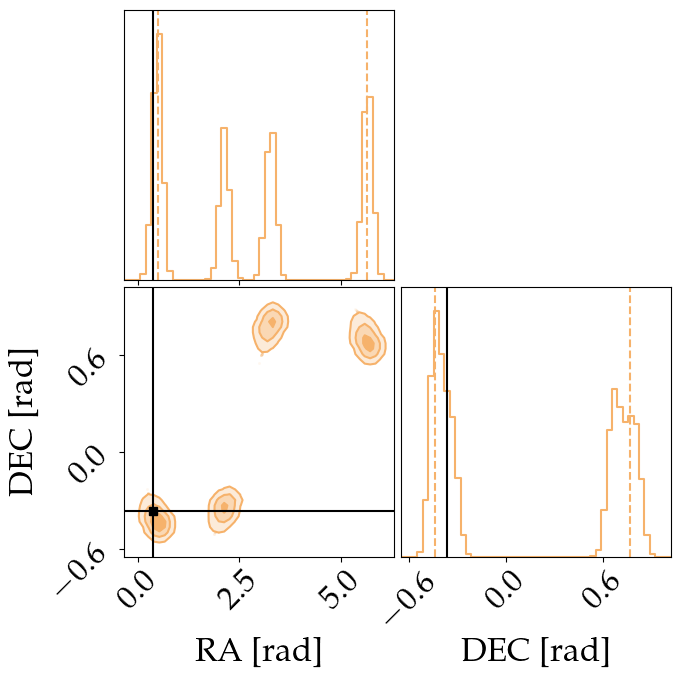

In [92]:
plot_name = fig_label
# Calculate the range dynamically with padding
padding = 0.1  # Extend range by 10%
data = posteriors
data_min = np.min(data, axis=0)
data_max = np.max(data, axis=0)
data_range = [(low - padding * (high - low), high + padding * (high - low)) for low, high in zip(data_min, data_max)]

figure = corner.corner(
    posteriors, 
    color=my_color2_darker, 
    truths=injections[corner_params].iloc[0].to_numpy(),
    range=data_range,  # Use calculated range with padding 
    labels=corner_lbs, 
    rect=[0, 0, 1, 1],
    **default_kwargs
)
figure.subplots_adjust(wspace=0.025, hspace=0.025)
plt.subplots_adjust(left=0.00, bottom=0.0, right=0.995, top=0.995)
# Save the plot to a file
plt.savefig(f'plots/{plot_name}.pdf', bbox_inches='tight')  
# Display the plot
plt.show()
plt.close()